In [1]:
import pandas as pd 
import geopandas as gpd
import holoviews as hv
import hvplot.pandas
import pandas as pd
import panel as pn

hv.extension('bokeh')
pn.extension()
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# disable warnings up front for a cleaner experience
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
!pip install geoviews


'pip' is not recognized as an internal or external command,
operable program or batch file.


# ABSTRACT


In [2]:
df = pd.read_excel("./2023 County Health Rankings Data - v2.xlsx", sheet_name="Ranked Measure Data",  header=[0,1])
quartile_study = pd.read_excel("./2023 County Health Rankings Data - v2.xlsx", sheet_name="Outcomes & Factors Rankings",header=[1])

In [3]:
# Creating mask for different states of US: 
# First we need to get all the states from the DataFrame into a list
state_names = df['Unnamed: 1_level_0'].State.unique()
state_names
state_dict_df ={}
for i in state_names:
    state_dict_df[i] = df[df['Unnamed: 1_level_0'].State == i]


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [4]:
df = pd.read_excel("./2023 County Health Rankings Data - v2.xlsx", sheet_name="Ranked Measure Data",header=[0,1])
df.columns = ['_'.join(col).strip() for col in df.columns.values]



In [35]:
df = df.rename(columns = {'Unnamed: 1_level_0_State':'State',  'Unnamed: 2_level_0_County':'Counties', 'Premature Death_Deaths':'Premature Deaths','Alcohol-Impaired Driving Deaths_# Driving Deaths':'Driving Deaths','Injury Deaths_# Injury Deaths':'Injury Deaths', 'Primary Care Physicians_# Primary Care Physicians':'Primary Health Care','Adult Smoking_% Adults Reporting Currently Smoking': 'Excessive Adult Smoking','Driving Alone to Work_% Drive Alone to Work':'Driving Alone','Adult Obesity_% Adults with Obesity':'Adult Obesity'})
df.head()

,Unnamed: 0_level_0_FIPS,State,Counties,Premature Death_Unreliable,Premature Deaths,Premature Death_Years of Potential Life Lost Rate,Premature Death_95% CI - Low,Premature Death_95% CI - High,Premature Death_Quartile,Premature Death_YPLL Rate (AIAN),...,Driving Alone to Work_% Drive Alone (Hispanic) 95% CI - Low,Driving Alone to Work_% Drive Alone (Hispanic) 95% CI - High,Driving Alone to Work_% Drive Alone (White),Driving Alone to Work_% Drive Alone (White) 95% CI - Low,Driving Alone to Work_% Drive Alone (White) 95% CI - High,Long Commute - Driving Alone_# Workers who Drive Alone,Long Commute - Driving Alone_% Long Commute - Drives Alone,Long Commute - Driving Alone_95% CI - Low,Long Commute - Driving Alone_95% CI - High,Long Commute - Driving Alone_Quartile
0,1000,Alabama,NaN,NaN,88086.0,10350.071456,10246.133257,10454.009654,NaN,5967.152772,...,73.063782,76.460378,84.903068,84.506276,85.299861,2146674,35.0,34.523404,35.476596,NaN
1,1001,Alabama,Autauga,NaN,836.0,8027.394727,7197.625811,8857.163642,1.0,NaN,...,NaN,NaN,83.056872,77.725061,88.388683,26458,41.6,36.414625,46.785375,3.0
2,1003,Alabama,Baldwin,NaN,3377.0,8118.358206,7666.874101,8569.842311,1.0,NaN,...,48.583973,66.891654,80.332637,78.502319,82.162955,102650,37.6,34.962526,40.237474,2.0
3,1005,Alabama,Barbour,NaN,539.0,12876.760319,11149.914146,14603.606492,4.0,NaN,...,NaN,NaN,84.436759,80.659918,88.213600,8461,36.5,30.560452,42.439548,2.0
4,1007,Alabama,Bibb,NaN,460.0,11191.474323,9625.525237,12757.423408,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,7994,55.1,46.056447,64.143553,4.0


In [6]:
a= list(df.columns)
for i in a:
    print(i)
required_cols = ['Adult Smoking_Quartile','Adult Obesity_Quartile','Physical Inactivity_Quartile','Excessive Drinking_Quartile','Alcohol-Impaired Driving Deaths_# Alcohol-Impaired Driving Deaths','Unemployment_Quartile','Driving Alone to Work_Quartile','Long Commute - Driving Alone_Quartile']

Unnamed: 0_level_0_FIPS
State
Counties
Premature Death_Unreliable
Premature Deaths
Premature Death_Years of Potential Life Lost Rate
Premature Death_95% CI - Low
Premature Death_95% CI - High
Premature Death_Quartile
Premature Death_YPLL Rate (AIAN)
Premature Death_YPLL Rate (AIAN) 95% CI - Low
Premature Death_YPLL Rate (AIAN) 95% CI - High
Premature Death_YPLL Rate (AIAN) Unreliable
Premature Death_YPLL Rate (Asian)
Premature Death_YPLL Rate (Asian) 95% CI - Low
Premature Death_YPLL Rate (Asian) 95% CI - High
Premature Death_YPLL Rate (Asian) Unreliable
Premature Death_YPLL Rate (Black)
Premature Death_YPLL Rate (Black) 95% CI - Low
Premature Death_YPLL Rate (Black) 95% CI - High
Premature Death_YPLL Rate (Black) Unreliable
Premature Death_YPLL Rate (Hispanic)
Premature Death_YPLL Rate (Hispanic) 95% CI - Low
Premature Death_YPLL Rate (Hispanic) 95% CI - High
Premature Death_YPLL Rate (Hispanic) Unreliable
Premature Death_YPLL Rate (White)
Premature Death_YPLL Rate (White) 95% CI - Lo

In [7]:
## Specific columns we want to work on initially
columns_to_keep = ['State', 'Counties','Premature Deaths','Driving Deaths','Injury Deaths']
new_df = df[columns_to_keep]
new_df.head()

,State,Counties,Premature Deaths,Driving Deaths,Injury Deaths
0,Alabama,NaN,88086.0,4848.0,21249.0
1,Alabama,Autauga,836.0,56.0,191.0
2,Alabama,Baldwin,3377.0,177.0,817.0
3,Alabama,Barbour,539.0,32.0,103.0
4,Alabama,Bibb,460.0,28.0,116.0


In [8]:
premature_deaths = new_df[new_df['Counties'].isnull()]
premature_deaths
del premature_deaths['Counties']

,State,Counties,Premature Deaths,Driving Deaths,Injury Deaths
0,Alabama,NaN,88086.0,4848.0,21249.0
68,Alaska,NaN,8663.0,374.0,3673.0
98,Arizona,NaN,90822.0,4995.0,32367.0
114,Arkansas,NaN,50906.0,2745.0,12833.0
190,California,NaN,378883.0,18737.0,108182.0
249,Colorado,NaN,58091.0,3106.0,23685.0
314,Connecticut,NaN,38493.0,1423.0,13494.0
323,Delaware,NaN,13471.0,597.0,4211.0
327,District of Columbia,NaN,8978.0,148.0,3317.0
329,Florida,NaN,282304.0,15939.0,92013.0


PLOTTING DEATHS AGAINST STATES


<Figure size 1200x600 with 0 Axes>

<BarContainer object of 51 artists>

Text(0.5, 0, 'State')

Text(0, 0.5, 'Premature Deaths')

Text(0.5, 1.0, 'Premature Deaths by State')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'Arizona'),
  Text(3, 0, 'Arkansas'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Colorado'),
  Text(6, 0, 'Connecticut'),
  Text(7, 0, 'Delaware'),
  Text(8, 0, 'District of Columbia'),
  Text(9, 0, 'Florida'),
  Text(10, 0, 'Georgia'),
  Text(11, 0, 'Hawaii'),
  Text(12, 0, 'Idaho'),
  Text(13, 0, 'Illinois'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'Iowa'),
  Text(16, 0, 'Kansas'),
  Text(17, 0, 'Kentucky'),
  Text(18, 0, 'Louisiana'),
  Text(19, 0, 'Maine'),
  Text(20, 0, 'Maryland'),
  Text(21, 0, 'Massachusetts'),
  Text(22, 0, 'Michigan'),
  Text(23, 0, 'Minnesota'),
  Text(24, 0, 'Mississippi'),
  Text(25, 0, 'Missouri'),
  Tex

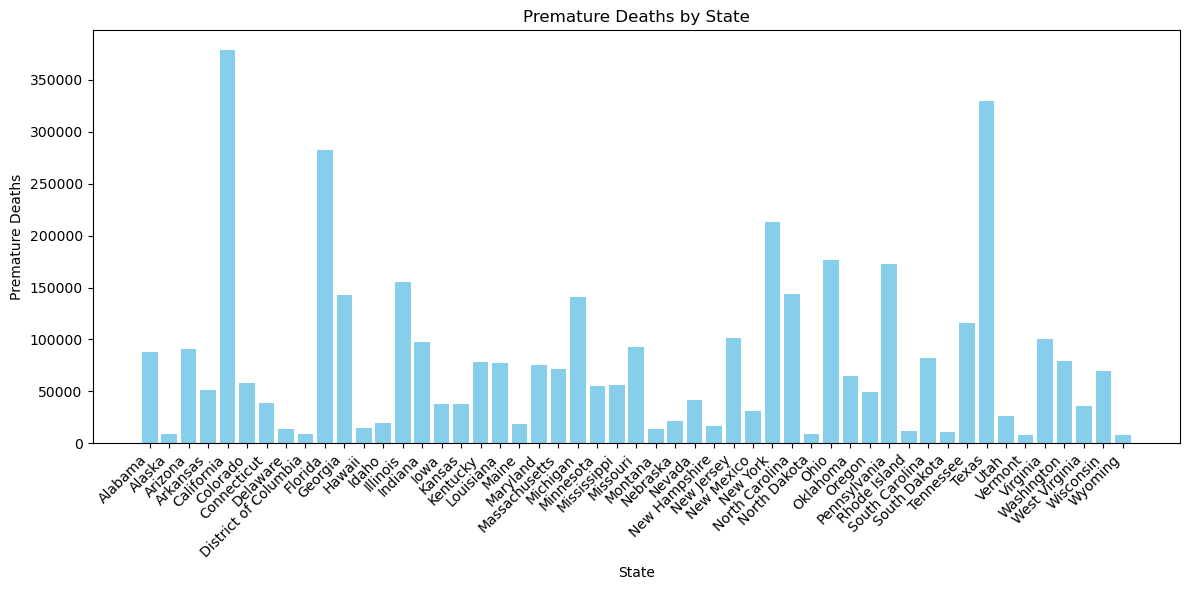

In [9]:
import matplotlib.pyplot as plt

# Plotting the data using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(premature_deaths['State'], premature_deaths['Premature Deaths'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Premature Deaths')
plt.title('Premature Deaths by State')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [10]:
# import hvplot.pandas
# import holoviews as hv
# from holoviews import opts



# # Scatter plot
# scatter_plot = new_df.hvplot.scatter(x='State', y='Premature Deaths', title='Scatter Plot - Premature Deaths by State').opts(
#     marker='o', size=8, color='red', line_color='black'
# )
# hv.extension('plotly')
# hvplot.show(scatter_plot)


In [45]:
req_col = ['State','Premature Deaths','Driving Deaths','Injury Deaths','Excessive Adult Smoking','Driving Alone','Adult Obesity']
df_1 = df[req_col]
df_1['State'] 
df_1 = df_1.drop_duplicates(subset=['State'])
df_1.reset_index(drop=True, inplace=True)
df_1

0       Alabama
1       Alabama
2       Alabama
3       Alabama
4       Alabama
         ...   
3188    Wyoming
3189    Wyoming
3190    Wyoming
3191    Wyoming
3192    Wyoming
Name: State, Length: 3193, dtype: object

,State,Premature Deaths,Driving Deaths,Injury Deaths,Excessive Adult Smoking,Driving Alone,Adult Obesity
0,Alabama,88086.0,4848.0,21249.0,19.5,83.782493,39.3
1,Alaska,8663.0,374.0,3673.0,18.0,67.491712,31.8
2,Arizona,90822.0,4995.0,32367.0,13.7,72.531923,31.5
3,Arkansas,50906.0,2745.0,12833.0,21.6,81.484503,37.2
4,California,378883.0,18737.0,108182.0,9.0,70.141800,30.2
5,Colorado,58091.0,3106.0,23685.0,12.6,70.624621,24.2
6,Connecticut,38493.0,1423.0,13494.0,12.6,74.063253,29.5
7,Delaware,13471.0,597.0,4211.0,15.8,76.781607,36.2
8,District of Columbia,8978.0,148.0,3317.0,12.3,30.726064,24.2
9,Florida,282304.0,15939.0,92013.0,15.5,76.082461,28.3


import folium
import panel as pn

# pn.extension(sizing_mode="stretch_width")
# m = folium.Map(location=[40, -102], zoom_start=3.9)

# folium_pane = pn.pane.plot.Folium(m, height=400)
# folium_pane

import geopandas as gpd
import mapclassify
     
USA=gpd.read_file('./ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp')
USA_subset = USA[["name", "geometry"]]

# Displaying the resulting GeoDataFrame
USA_subset_sorted = USA_subset.sort_values(by="name")
Death_merge_geo = pd.merge(USA_subset,df_1, left_on='name',right_on='State')
Death_merge_geo = Death_merge_geo.drop('State', axis=1)
Death_merge_geo = Death_merge_geo.rename(columns={'name': 'State'})
Death_merge_geo['TOTAL_DEATH'] = Death_merge_geo['Premature Deaths'] + Death_merge_geo['Driving Deaths'] + Death_merge_geo['Injury Deaths']
Death_merge_geo["geometry"] = Death_merge_geo["geometry"].centroid

Death_merge_geo['Percentage_death']= round((Death_merge_geo['TOTAL_DEATH']/5551976.0)*100,2)
Death_merge_geo.head()


In [12]:
!pip install folium

In [14]:
import folium
import panel as pn
import geoviews as gv

# pn.extension(sizing_mode="stretch_width")
# m = folium.Map(location=[40, -102], zoom_start=3.9)

# folium_pane = pn.pane.plot.Folium(m, height=400)
# folium_pane

import geopandas as gpd
import mapclassify
     
USA=gpd.read_file('./ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp')

# Displaying the resulting GeoDataFrame
USA = USA.sort_values(by="name")

Death_merge_geo = pd.merge(USA,df_1, left_on='name',right_on='State')
Death_merge_geo = Death_merge_geo.drop('State', axis=1)
Death_merge_geo = Death_merge_geo.rename(columns={'name': 'State'})
Death_merge_geo.drop(Death_merge_geo[Death_merge_geo['State'] == 'Alaska'].index, inplace=True)
Death_merge_geo.drop(Death_merge_geo[Death_merge_geo['State'] == 'Hawaii'].index, inplace=True)
Death_merge_geo['TOTAL_DEATH'] = Death_merge_geo['Premature Deaths'] + Death_merge_geo['Driving Deaths'] + Death_merge_geo['Injury Deaths']
Death_merge_geo['Percentage_death']= round((Death_merge_geo['TOTAL_DEATH']/5551976.0)*100,4)

C:\Users\eshaa\AppData\Local\Temp\ipykernel_15676\822639183.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Death_merge_geo_centroid["geometry"] = Death_merge_geo_centroid["geometry"].centroid
c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

[]

[]

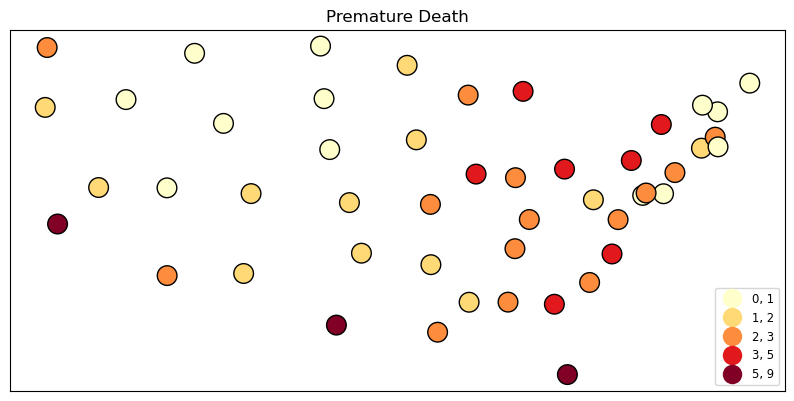

In [16]:
Death_merge_geo_centroid = Death_merge_geo.copy()

Death_merge_geo_centroid["geometry"] = Death_merge_geo_centroid["geometry"].centroid
     
#USE DEATH_MERGE_GEO DATASET HERE.
fig, ax = plt.subplots(1, figsize=(10,10))
Death_merge_geo_centroid.plot(ax=ax,column='Percentage_death',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text("Premature Death")
ax.set_xticks([]); ax.set_yticks([])

So far, we've seen different categorical deaths against their respectivr states. Now let's plot deaths occured due to different causes against their respective states.


c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

[]

[]

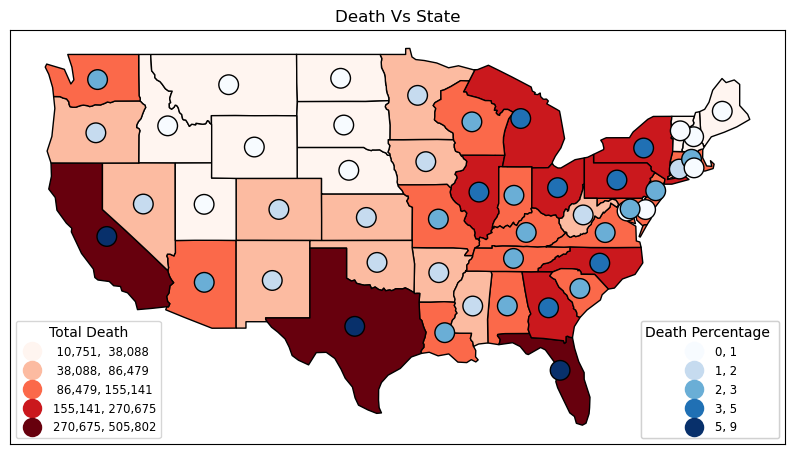

In [17]:
fig, ax = plt.subplots(1, figsize=(10,10))
Death_merge_geo.plot(ax=ax,column='TOTAL_DEATH',legend=True,cmap='Reds',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Total Death''')

Death_merge_geo_centroid.plot(ax=ax,column='Percentage_death',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #

ax.title.set_text("Death Vs State")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Death Percentage ''')

ax.add_artist(l2)
ax.add_artist(l1)

In [18]:
Death_merge_geo.sort_values(by='Percentage_death', ascending=False).head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,State,name_alt,...,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry,Premature Deaths,Driving Deaths,Injury Deaths,TOTAL_DEATH,Percentage_death
4,Admin-1 scale rank,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,California,CA|Calif.,...,None,None,None,None,"POLYGON ((-114.64222 35.05311, -114.62212 34.9...",378883.0,18737.0,108182.0,505802.0,9.1103
43,Admin-1 scale rank,2,USA-3536,3536,US-TX,http://en.wikipedia.org/wiki/Texas,US,4,Texas,TX|Tex.,...,None,None,None,None,"POLYGON ((-106.50734 31.75429, -106.61953 31.9...",329942.0,18660.0,85669.0,434271.0,7.8219
9,Admin-1 scale rank,2,USA-3542,3542,US-FL,http://en.wikipedia.org/wiki/Florida,US,5,Florida,FL|Fla.,...,None,None,None,None,"POLYGON ((-87.53039 30.27420, -87.45789 30.411...",282304.0,15939.0,92013.0,390256.0,7.0291
32,Admin-1 scale rank,2,USA-3559,3559,US-NY,http://en.wikipedia.org/wiki/New_York,US,3,New York,NY|N.Y.,...,None,None,None,None,"POLYGON ((-73.49794 42.05451, -73.55349 41.289...",213529.0,4967.0,52179.0,270675.0,4.8753
35,Admin-1 scale rank,2,USA-3550,3550,US-OH,http://en.wikipedia.org/wiki/Ohio,US,1,Ohio,OH|Ohio,...,None,None,None,None,"POLYGON ((-84.82368 39.10653, -84.81787 39.799...",177010.0,5762.0,55929.0,238701.0,4.2994


## From this graph we can see that the following states have the highest Death in the States:
- California
- Texas
- Florida
- New York
- Ohio

## We want to compare the Death to the population of the states in US. 
For that we are using another dataset which has the population data 

In [19]:
population_dens = pd.read_csv('./productDownload_2023-12-15T145448/population_data.csv')
counties = ['West Virginia','Mississippi','New Mexico']
population_dens[population_dens['NAME'].isin(counties)]

,GEO_ID,NAME,P1_001N
24,0400000US28,Mississippi,2961279
31,0400000US35,New Mexico,2117522
48,0400000US54,West Virginia,1793716


C:\Users\eshaa\AppData\Local\Temp\ipykernel_15676\817904292.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Axes: >

c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Axes: >

[]

[]

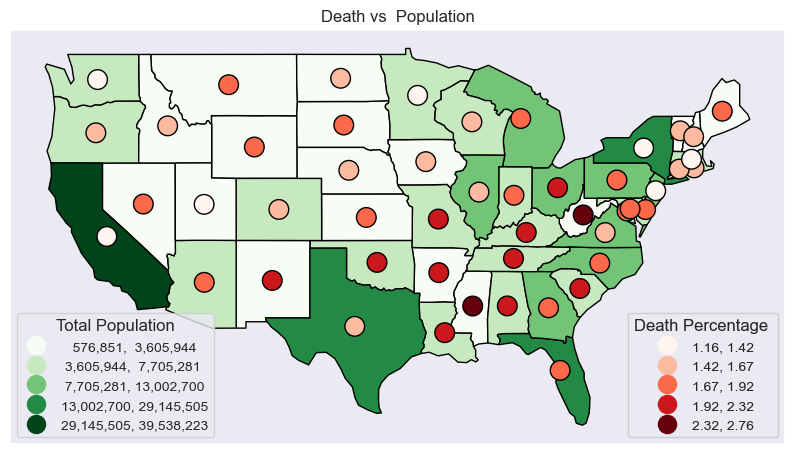

In [40]:

population_death = pd.merge(Death_merge_geo,population_dens, left_on='State',right_on='NAME')
population_death = population_death.drop('NAME', axis=1)
population_death['Death_by_population'] = (population_death['TOTAL_DEATH']/population_death['P1_001N'])*100
population_death = population_death.sort_values(by='Death_by_population',ascending=False)
population_death_centroid = population_death.copy()
population_death['Premature Deaths by Population'] = (population_death['Premature Deaths']/population_death['P1_001N'])*100
population_death['Driving Deaths by Population'] = (population_death['Driving Deaths']/population_death['P1_001N'])*100
population_death['Injury Deaths by Population'] = (population_death['Injury Deaths']/population_death['P1_001N'])*100



population_death_centroid["geometry"] = population_death_centroid["geometry"].centroid


fig, ax = plt.subplots(1, figsize=(10,10))
population_death.plot(ax=ax,column='P1_001N',legend=True,cmap='Greens',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Total Population''')

population_death_centroid.plot(ax=ax,column='Death_by_population',legend=True,cmap='Reds',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #

ax.title.set_text("Death vs  Population")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Death Percentage ''')

ax.add_artist(l2)
ax.add_artist(l1)

C:\Users\eshaa\AppData\Local\Temp\ipykernel_15676\2528796253.py:10: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Axes: >

Text(0.5, 1.0, 'Total Population in West Virginia Counties')

c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Axes: title={'center': 'Total Population in West Virginia Counties'}>

[]

[]

c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Axes: >

Text(0.5, 1.0, 'Total Population in West Virginia Counties')

c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Axes: title={'center': 'Total Population in West Virginia Counties'}>

[]

[]

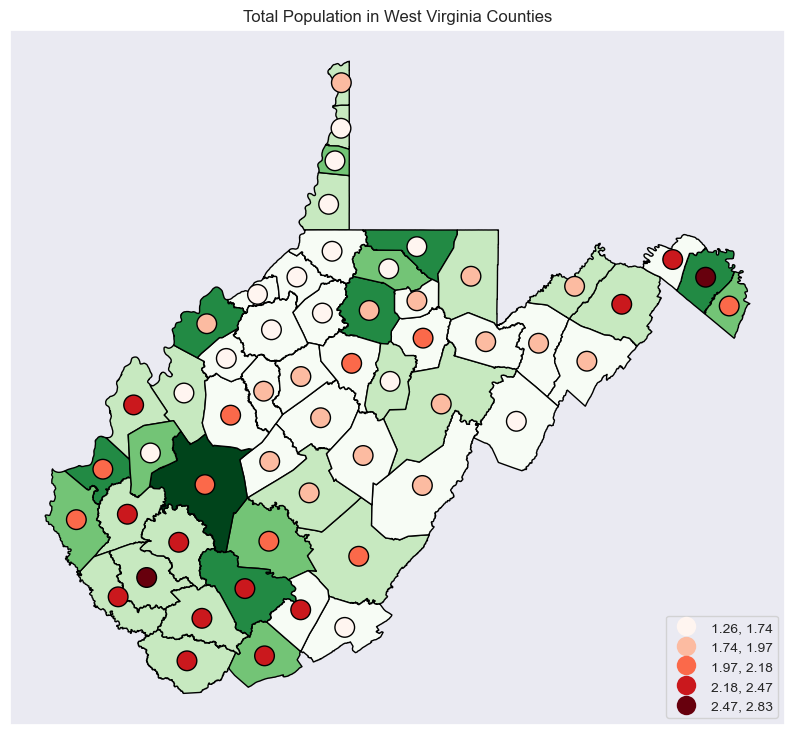

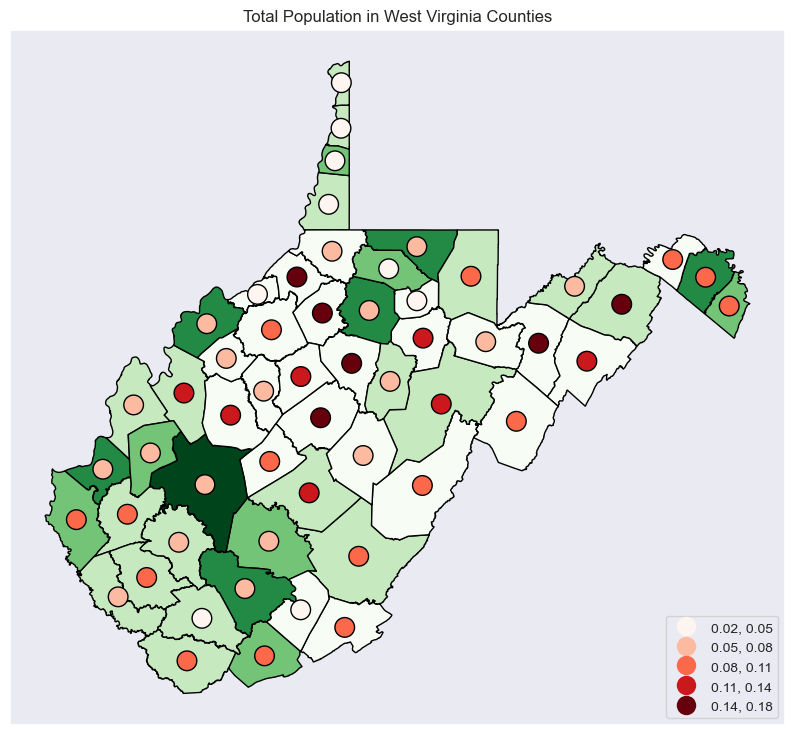

In [34]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'virginia_death_geo' contains the dataset
virginia_death_geo['Premature_Death_Percentage'] = (virginia_death_geo['Premature Deaths'] / virginia_death_geo['POP2000']) * 100
virginia_death_geo['Driving_Death_Percentage'] = (virginia_death_geo['Driving Deaths'] / virginia_death_geo['POP2000']) * 100

virginia_death_geo_centroid = virginia_death_geo.copy()
virginia_death_geo_centroid["geometry"] = virginia_death_geo_centroid["geometry"].centroid

# Plot the map for Premature Death
fig_premature, ax_premature = plt.subplots(figsize=(10, 10))
virginia_death_geo.plot(ax=ax_premature, column='POP2000', legend=True, cmap='Greens', scheme='natural_breaks', k=5,
                        edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.0f}",
                                                                    'loc': 'lower left', 'title_fontsize': 'medium',
                                                                    'fontsize': 'small', 'markerscale': 1.4})
ax_premature.set_title("Total Population in West Virginia Counties")

# Plot premature death percentage
virginia_death_geo_centroid.plot(ax=ax_premature, column='Premature_Death_Percentage', legend=True, cmap='Reds', scheme='natural_breaks',
                                 k=5, edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.2f}",
                                                                                   'loc': 'lower right', 'title_fontsize': 'medium',
                                                                                   'fontsize': 'small', 'markerscale': 1.4},
                                 markersize=200)
ax_premature.set_xticks([]); ax_premature.set_yticks([])

# Plot the map for Driving Death
fig_driving, ax_driving = plt.subplots(figsize=(10, 10))
virginia_death_geo.plot(ax=ax_driving, column='POP2000', legend=True, cmap='Greens', scheme='natural_breaks', k=5,
                        edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.0f}",
                                                                    'loc': 'lower left', 'title_fontsize': 'medium',
                                                                    'fontsize': 'small', 'markerscale': 1.4})
ax_driving.set_title("Total Population in West Virginia Counties")

# Plot driving death percentage
virginia_death_geo_centroid.plot(ax=ax_driving, column='Driving_Death_Percentage', legend=True, cmap='Reds', scheme='natural_breaks',
                                 k=5, edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.2f}",
                                                                                   'loc': 'lower right', 'title_fontsize': 'medium',
                                                                                   'fontsize': 'small', 'markerscale': 1.4},
                                 markersize=200)
ax_driving.set_xticks([]); ax_driving.set_yticks([])

plt.show()


c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Obesity V/S Food Environment Index')

[]

[]

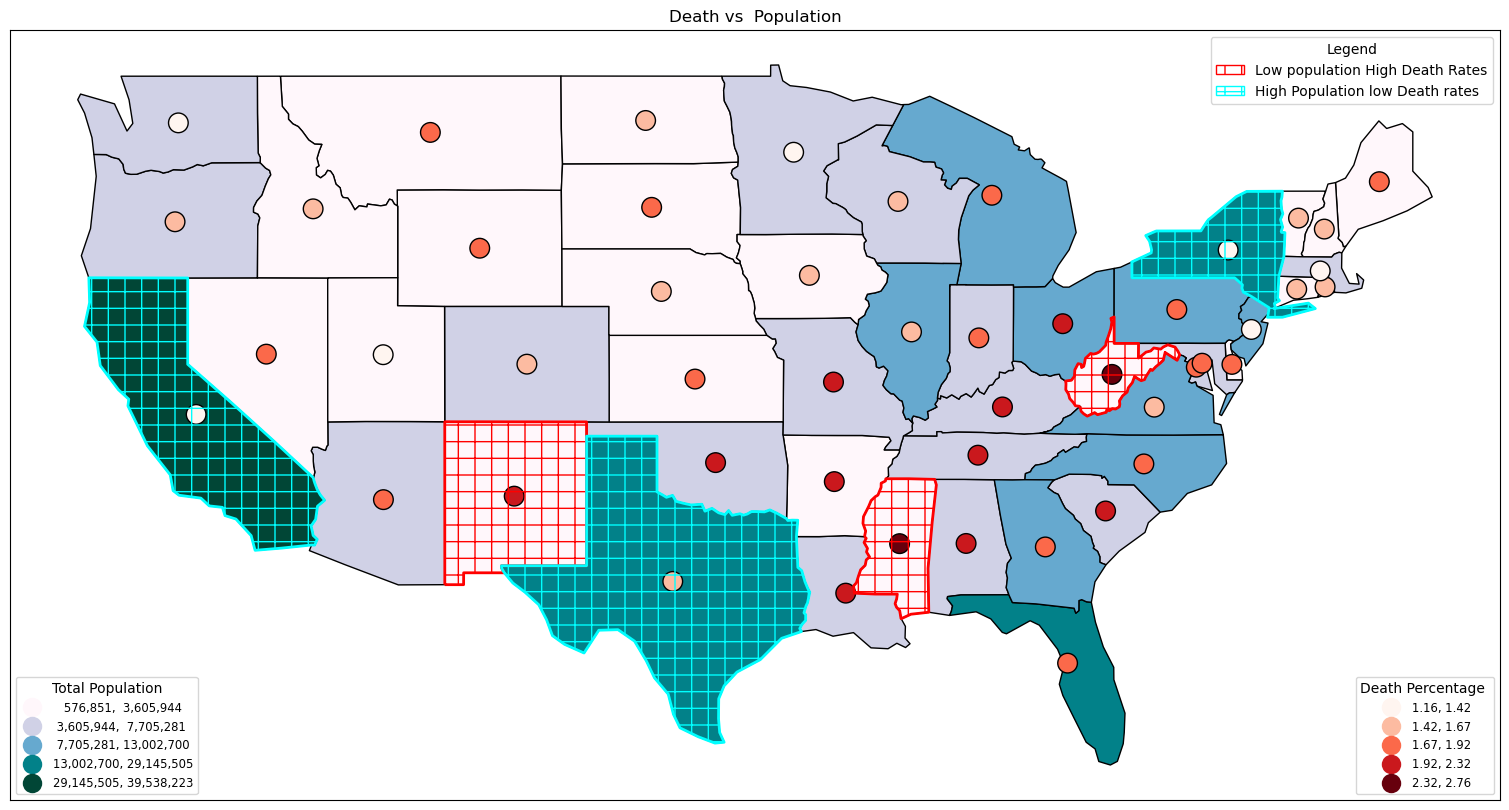

In [22]:
import matplotlib.patches as mpatches

cal_datac_q = population_death.query("State=='Mississippi' | State=='West Virginia' | State=='New Mexico'")
cal_datac_e = population_death.query("State=='California' | State=='New York' | State=='Texas'")

fig, ax = plt.subplots(1,figsize=(20, 10))

population_death.plot(ax=ax,column='P1_001N',legend=True,cmap='PuBuGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Total Population''')

population_death_centroid.plot(ax=ax,column='Death_by_population',legend=True,cmap='Reds',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #

l2 = ax.get_legend()
l2.set_title('''Death Percentage ''')

cal_datac_q.plot(ax=ax, edgecolor='red', linewidth=2, facecolor="none", alpha=1, hatch='+')
cal_datac_e.plot(ax=ax, edgecolor='cyan', linewidth=2, facecolor="none", alpha=1, hatch='+')

legend_elements1 = []
legend_elements1.append(mpatches.Patch(edgecolor='red', facecolor='none', hatch='+',
                                      label="Low population High Death Rates"))
legend_elements1.append(mpatches.Patch(edgecolor='cyan', facecolor='none', hatch='+',
                                      label="High Population low Death rates"))

ax.set_title('Obesity V/S Food Environment Index')

ax.legend(handles=legend_elements1, loc='upper right', title="Legend")

ax.title.set_text("Death vs  Population")
ax.set_xticks([]); ax.set_yticks([])



ax.add_artist(l2)
ax.add_artist(l1)
# cbar_obesity = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', shrink=0.5)
# cbar_obesity.set_label("Obesity Percentage")

# cbar_fei = plt.colorbar(ax.collections[1], ax=ax, orientation='vertical', shrink=0.5)
# cbar_fei.set_label("Food Environment Index")

## As per the previous map and bar graph, it looked like California had the maximum number of Deaths. However, when we compare it with the population, it looked otherwise. 
#### When we compared the ratio of Population with the deaths, we found that the following states had the maximum number of Deaths per population:
- West Virginia
- Mississippi
- Kentucky
- Alabama
- Tennessee

In [23]:
print("Low Populations High Deaths")
counties = ['West Virginia','Mississippi','New Mexico']
population_dens[population_dens['NAME'].isin(counties)]

Low Populations High Deaths


,GEO_ID,NAME,P1_001N
24,0400000US28,Mississippi,2961279
31,0400000US35,New Mexico,2117522
48,0400000US54,West Virginia,1793716


In [24]:
print("High Populations Low Deaths")
counties = ['California','New York','Texas']
population_dens[population_dens['NAME'].isin(counties)]

High Populations Low Deaths


,GEO_ID,NAME,P1_001N
4,0400000US06,California,39538223
32,0400000US36,New York,20201249
43,0400000US48,Texas,29145505


## We want to check the correlation between deaths and other factors for all the States to find out the main factors that are contributing to the Deaths 

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

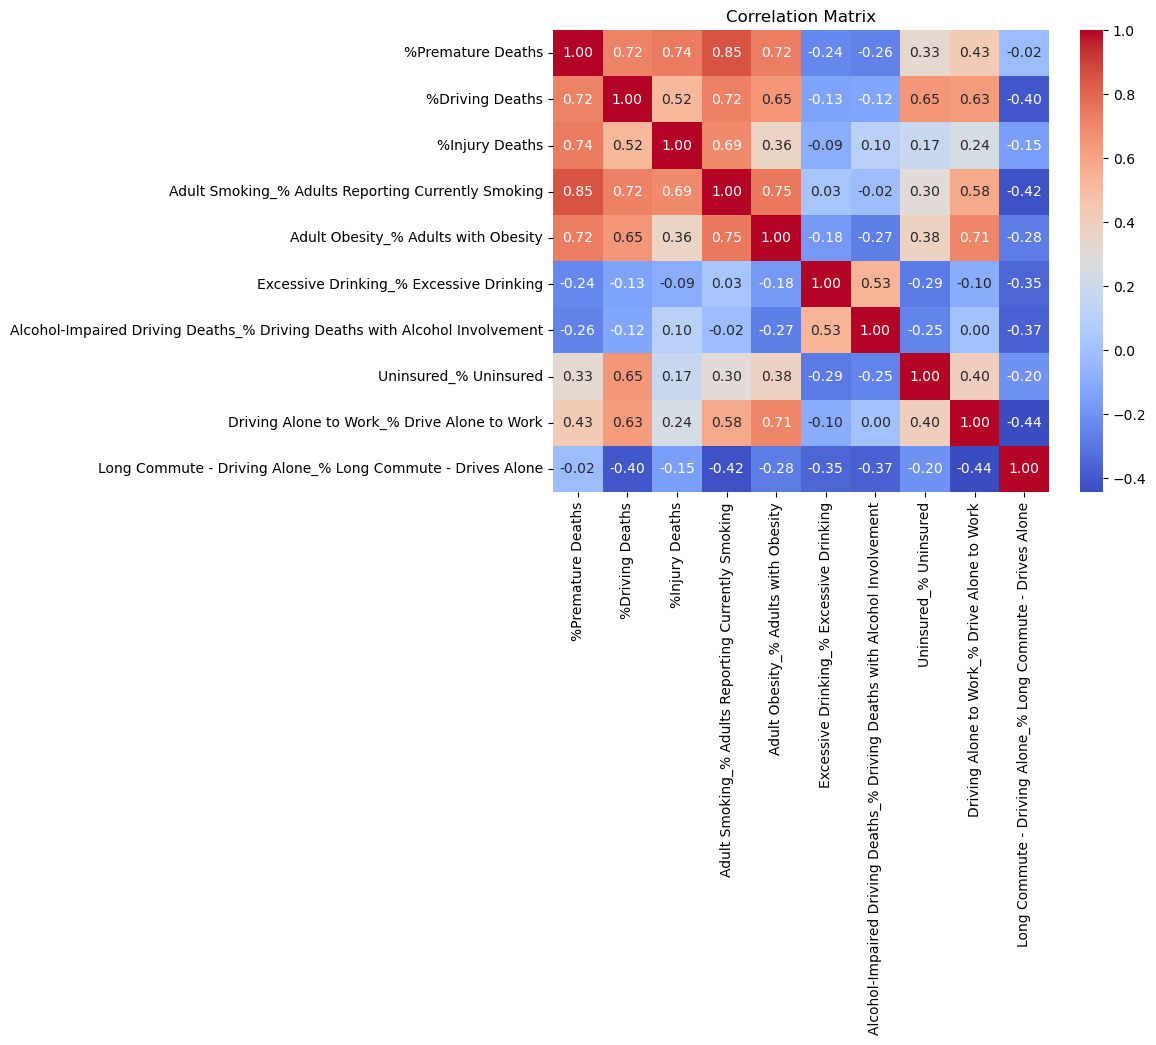

In [25]:
# required_cols = ['State','Counties','Premature Deaths','Driving Deaths','Injury Deaths','Adult Smoking_Quartile','Adult Obesity_Quartile','Physical Inactivity_Quartile','Excessive Drinking_Quartile','Alcohol-Impaired Driving Deaths_# Alcohol-Impaired Driving Deaths','Unemployment_Quartile','Driving Alone to Work_Quartile','Long Commute - Driving Alone_Quartile']
required_cols = ['State','Counties','Premature Deaths','Driving Deaths','Injury Deaths',
'Adult Smoking_% Adults Reporting Currently Smoking',
'Adult Obesity_% Adults with Obesity',
'Excessive Drinking_% Excessive Drinking',
'Alcohol-Impaired Driving Deaths_% Driving Deaths with Alcohol Involvement',
'Uninsured_% Uninsured',
'Driving Alone to Work_% Drive Alone to Work',
'Long Commute - Driving Alone_% Long Commute - Drives Alone',
]
all_data = df[required_cols]
West_Virginia_mask= all_data['State'] == 'West Virginia'
West_Virginia_df = all_data[West_Virginia_mask].dropna()

#MAKE A HEATMAP OF CORRELATION MATRIX
state_data = all_data[all_data['Counties'].isna()]
correlation_matrix_df = pd.merge(population_dens,state_data, left_on='NAME',right_on='State')
correlation_matrix_df = correlation_matrix_df.drop('Counties',axis=1)
correlation_matrix_df = correlation_matrix_df.drop('NAME',axis=1)
correlation_matrix_df['%Premature Deaths'] = (correlation_matrix_df['Premature Deaths']/correlation_matrix_df['P1_001N'])*100
correlation_matrix_df['%Driving Deaths'] = (correlation_matrix_df['Driving Deaths']/correlation_matrix_df['P1_001N'])*100
correlation_matrix_df['%Injury Deaths'] = (correlation_matrix_df['Injury Deaths']/correlation_matrix_df['P1_001N'])*100
# @title Correlation Matrix
import seaborn as sns
correlation_matrix = correlation_matrix_df[['%Premature Deaths','%Driving Deaths','%Injury Deaths',
'Adult Smoking_% Adults Reporting Currently Smoking',
'Adult Obesity_% Adults with Obesity',
'Excessive Drinking_% Excessive Drinking',
'Alcohol-Impaired Driving Deaths_% Driving Deaths with Alcohol Involvement',
'Uninsured_% Uninsured',
'Driving Alone to Work_% Drive Alone to Work',
'Long Commute - Driving Alone_% Long Commute - Drives Alone',
]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# We are going dig deeper into the Sate were there is less population and high Death rates to understand the factors leading to the high death rate:
## Lets start with West Virginia

In [26]:

WEST_VIRGINIA=gpd.read_file('./WV_County_Boundaries-shp/WV_Counties.shp')
death_virginia = new_df[new_df['State'] == 'West Virginia']

death_virginia = death_virginia.dropna()
# death_virginia
WEST_VIRGINIA = WEST_VIRGINIA.sort_values(by='NAME')
# WEST_VIRGINIA

virginia_death_geo = pd.merge(WEST_VIRGINIA,death_virginia, left_on='NAME',right_on='Counties')
virginia_death_geo = virginia_death_geo.drop('Counties',axis=1)
virginia_death_geo.head()



,FID,AREA_,PERIMETER,DEP_24K_,DEP_24K_ID,NAME,STATE,FIPS,POP1986,POP2000,...,CO_CODE,Shape_Leng,County,SHAPE_Le_1,SHAPE_Area,geometry,State,Premature Deaths,Driving Deaths,Injury Deaths
0,20,0.0,146810.022398,21,1,Barbour,54,54001,16500,15557,...,01,146810.317182,None,1.523978,0.092481,"POLYGON ((-79.89550 39.29951, -79.89486 39.299...",West Virginia,320.0,20.0,102.0
1,8,0.0,155904.398879,9,1,Berkeley,54,54003,51500,75905,...,02,155904.205670,None,1.601770,0.087150,"POLYGON ((-77.82506 39.49343, -77.82517 39.493...",West Virginia,2062.0,76.0,828.0
2,45,0.0,259327.006618,46,1,Boone,54,54005,29900,25535,...,03,259327.621228,None,2.661789,0.133730,"POLYGON ((-81.45660 37.98731, -81.45666 37.987...",West Virginia,576.0,19.0,174.0
3,33,0.0,172607.315752,34,1,Braxton,54,54007,14600,14702,...,04,172608.196746,None,1.777047,0.138564,"POLYGON ((-80.60580 38.90417, -80.60512 38.903...",West Virginia,279.0,24.0,92.0
4,55,0.0,80011.984631,56,1,Brooke,54,54009,29500,25447,...,05,80012.805649,None,0.804993,0.025451,"POLYGON ((-80.51911 40.15968, -80.52197 40.160...",West Virginia,428.0,6.0,106.0


Premature Deaths in West Virginia Counties 

C:\Users\eshaa\AppData\Local\Temp\ipykernel_15676\1361878064.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  virginia_death_geo_centroid["geometry"] = virginia_death_geo_centroid["geometry"].centroid
c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

[]

[]

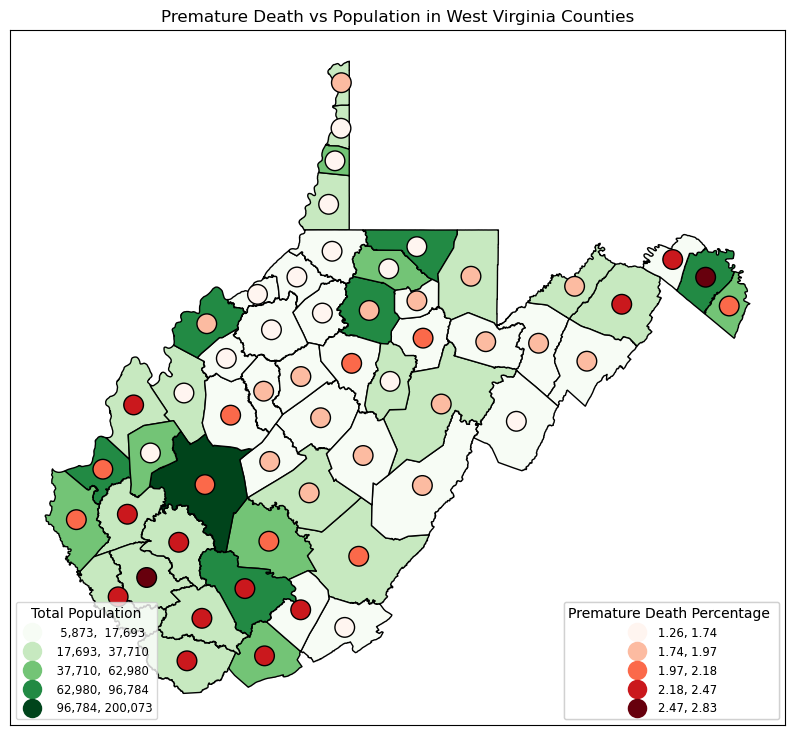

In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Calculate premature death percentage
virginia_death_geo['Premature_Death_Percentage'] = (virginia_death_geo['Premature Deaths'] / virginia_death_geo['POP2000']) * 100
# Assuming 'wv_counties' contains the new dataset
virginia_death_geo_centroid = virginia_death_geo.copy()
virginia_death_geo_centroid["geometry"] = virginia_death_geo_centroid["geometry"].centroid

# Plot the map
fig, ax = plt.subplots(1, figsize=(10, 10))

# Plot total population
virginia_death_geo.plot(ax=ax, column='POP2000', legend=True, cmap='Greens', scheme='natural_breaks', k=5,
                  edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.0f}",
                                                              'loc': 'lower left', 'title_fontsize': 'medium',
                                                              'fontsize': 'small', 'markerscale': 1.4})

l1 = ax.get_legend()
l1.set_title('''Total Population''')

# Plot premature death percentage
virginia_death_geo_centroid.plot(ax=ax, column='Premature_Death_Percentage', legend=True, cmap='Reds', scheme='natural_breaks',
                          k=5, edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.2f}",
                                                                            'loc': 'lower right', 'title_fontsize': 'medium',
                                                                            'fontsize': 'small', 'markerscale': 1.4},
                          markersize=200)

ax.title.set_text("Premature Death vs Population in West Virginia Counties")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Premature Death Percentage ''')

ax.add_artist(l2)
ax.add_artist(l1)

plt.show()


Driving Deaths in West Virginia Counties

C:\Users\eshaa\AppData\Local\Temp\ipykernel_15676\2338719979.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  virginia_death_geo_centroid["geometry"] = virginia_death_geo_centroid["geometry"].centroid
c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

[]

[]

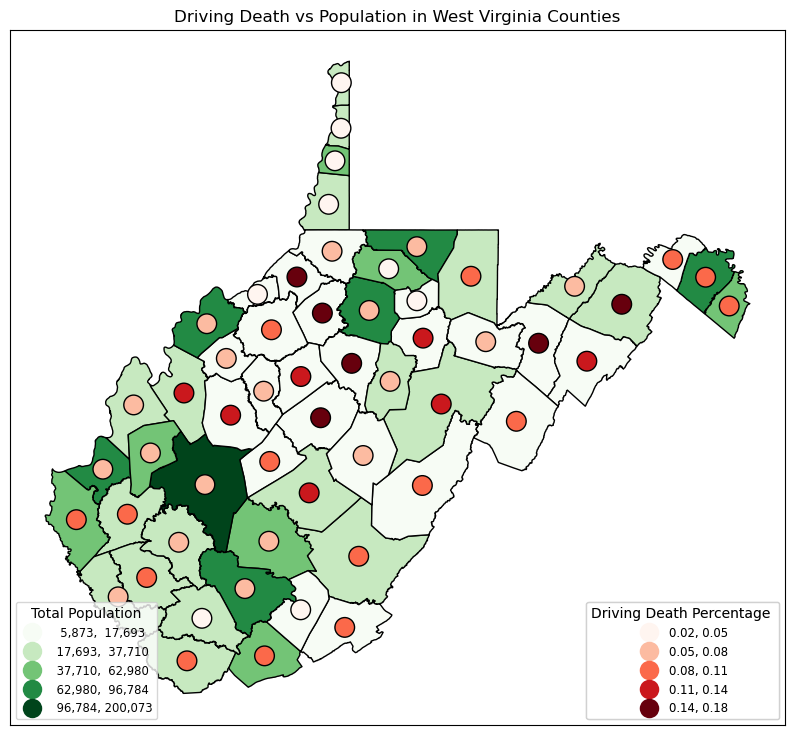

In [29]:
# Calculate driving  death percentage
virginia_death_geo['Driving_Death_Percentage'] = (virginia_death_geo['Driving Deaths'] / virginia_death_geo['POP2000']) * 100
# Assuming 'wv_counties' contains the new dataset
virginia_death_geo_centroid = virginia_death_geo.copy()
virginia_death_geo_centroid["geometry"] = virginia_death_geo_centroid["geometry"].centroid

# Plot the map
fig, ax = plt.subplots(1, figsize=(10, 10))

# Plot total population
virginia_death_geo.plot(ax=ax, column='POP2000', legend=True, cmap='Greens', scheme='natural_breaks', k=5,
                  edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.0f}",
                                                              'loc': 'lower left', 'title_fontsize': 'medium',
                                                              'fontsize': 'small', 'markerscale': 1.4})

l1 = ax.get_legend()
l1.set_title('''Total Population''')

# Plot driving death percentage
virginia_death_geo_centroid.plot(ax=ax, column='Driving_Death_Percentage', legend=True, cmap='Reds', scheme='natural_breaks',
                          k=5, edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.2f}",
                                                                            'loc': 'lower right', 'title_fontsize': 'medium',
                                                                            'fontsize': 'small', 'markerscale': 1.4},
                          markersize=200)

ax.title.set_text("Driving Death vs Population in West Virginia Counties")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Driving Death Percentage ''')

ax.add_artist(l2)
ax.add_artist(l1)

plt.show()

Injury Deaths in West Viriginia Counties

C:\Users\eshaa\AppData\Local\Temp\ipykernel_15676\3851879957.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  virginia_death_geo_centroid["geometry"] = virginia_death_geo_centroid["geometry"].centroid
c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

[]

[]

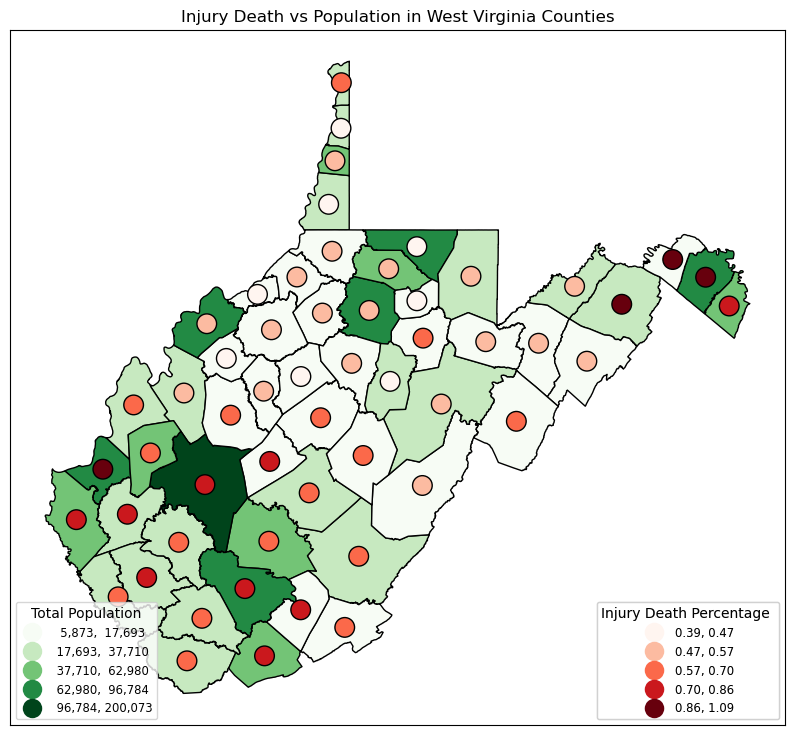

In [30]:
# Calculate Injury death percentage
virginia_death_geo['Injury_Death_Percentage'] = (virginia_death_geo['Injury Deaths'] / virginia_death_geo['POP2000']) * 100
# Assuming 'wv_counties' contains the new dataset
virginia_death_geo_centroid = virginia_death_geo.copy()
virginia_death_geo_centroid["geometry"] = virginia_death_geo_centroid["geometry"].centroid

# Plot the map
fig, ax = plt.subplots(1, figsize=(10, 10))

# Plot total population
virginia_death_geo.plot(ax=ax, column='POP2000', legend=True, cmap='Greens', scheme='natural_breaks', k=5,
                  edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.0f}",
                                                              'loc': 'lower left', 'title_fontsize': 'medium',
                                                              'fontsize': 'small', 'markerscale': 1.4})

l1 = ax.get_legend()
l1.set_title('''Total Population''')

# Plot injury death percentage
virginia_death_geo_centroid.plot(ax=ax, column='Injury_Death_Percentage', legend=True, cmap='Reds', scheme='natural_breaks',
                          k=5, edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.2f}",
                                                                            'loc': 'lower right', 'title_fontsize': 'medium',
                                                                            'fontsize': 'small', 'markerscale': 1.4},
                          markersize=200)

ax.title.set_text("Injury Death vs Population in West Virginia Counties")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Injury Death Percentage ''')

ax.add_artist(l2)
ax.add_artist(l1)

plt.show()

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='NAME', ylabel='Driving Deaths'>

<Axes: xlabel='NAME', ylabel='Driving Deaths'>

<Axes: xlabel='NAME', ylabel='Driving Deaths'>

Text(0.5, 0, 'Counties')

Text(0, 0.5, 'Number of Deaths')

Text(0.5, 1.0, 'Driving, Premature, and Injury Deaths by Counties')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54],
 [Text(0, 0, 'Barbour'),
  Text(1, 0, 'Berkeley'),
  Text(2, 0, 'Boone'),
  Text(3, 0, 'Braxton'),
  Text(4, 0, 'Brooke'),
  Text(5, 0, 'Cabell'),
  Text(6, 0, 'Calhoun'),
  Text(7, 0, 'Clay'),
  Text(8, 0, 'Doddridge'),
  Text(9, 0, 'Fayette'),
  Text(10, 0, 'Gilmer'),
  Text(11, 0, 'Grant'),
  Text(12, 0, 'Greenbrier'),
  Text(13, 0, 'Hampshire'),
  Text(14, 0, 'Hancock'),
  Text(15, 0, 'Hardy'),
  Text(16, 0, 'Harrison'),
  Text(17, 0, 'Jackson'),
  Text(18, 0, 'Jefferson'),
  Text(19, 0, 'Kanawha'),
  Text(20, 0, 'Lewis'),
  Text(21, 0, 'Lincoln'),
  Text(22, 0, 'Logan'),
  Text(23, 0, 'Marion'),
  Text(24, 0, 'Marshall'),
  Text(25, 0, 'Mason'),
  Text(26, 0, 'McDow

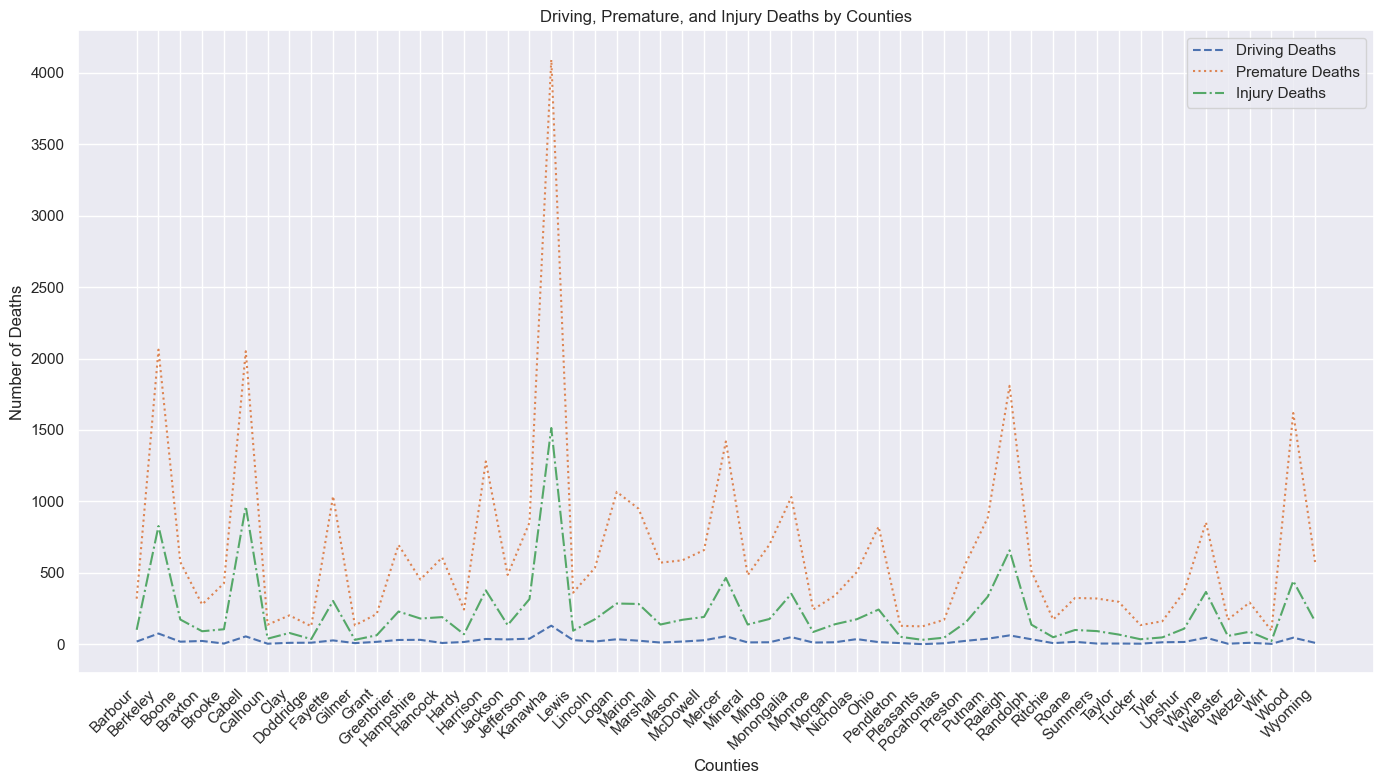

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="darkgrid")

# Plotting the data using Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(x='NAME', y='Driving Deaths', data=virginia_death_geo, label='Driving Deaths', linestyle='dashed')
sns.lineplot(x='NAME', y='Premature Deaths', data=virginia_death_geo, label='Premature Deaths', linestyle='dotted')
sns.lineplot(x='NAME', y='Injury Deaths',data=virginia_death_geo, label='Injury Deaths', linestyle='dashdot')

plt.xlabel('Counties')
plt.ylabel('Number of Deaths')
plt.title('Driving, Premature, and Injury Deaths by Counties')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
#make this plot interactive and you can then add hover feature.


In [32]:
# @title Relation Between Unemployment Rate, Poverty % and Physical Inactivity
import plotly.graph_objs as go

# Assuming corr is a DataFrame containing the necessary data

fig = go.Figure()

# Add the first trace
fig.add_trace(go.Scatter(x=virginia_death_geo['NAME'], y=virginia_death_geo['Driving Deaths'], mode='lines', name='Death Due to Driving ', line=dict(color='#53D1BA')))

# Add the second trace
fig.add_trace(go.Scatter(x=virginia_death_geo['NAME'], y=virginia_death_geo['Premature Deaths'], mode='lines', name='Premature Death ', line=dict(color='#D11E5D')))

# Add a third trace (assuming 'Column_3' is another column in corr)
fig.add_trace(go.Scatter(x=virginia_death_geo['NAME'], y=virginia_death_geo['Injury Deaths'], mode='lines', name='Injury Death', line=dict(color='#FFA500')))  # Adjust color and name as needed

# Update the layout
fig.update_layout(
    title='Counties vs Death Factors [Driving, Premature, and Injury Deaths by State]',
    xaxis=dict(title='Counties of West Virginia'),
    yaxis=dict(title='Normalized Value'),
    #yaxis2=dict(title='Normalized Physical Inactivity Rate', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.15, orientation='h'),
    template='plotly_dark'
)

# Show the figure
fig.show()

## We want to check the correlation between deaths and other factors for all the States to find out the main factors that are contributing to the Deaths 

# Compare the smoking,alcohol consumption, drining, cancer, poor mental health, etc vs other states to show the difference

,FID,AREA_,PERIMETER,DEP_24K_,DEP_24K_ID,NAME,STATE,FIPS,POP1986,POP2000,...,SHAPE_Le_1,SHAPE_Area,geometry,State,Premature Deaths,Driving Deaths,Injury Deaths,Premature_Death_Percentage,Driving_Death_Percentage,Injury_Death_Percentage
0,20,0.0,146810.022398,21,1,Barbour,54,54001,16500,15557,...,1.523978,0.092481,"POLYGON ((-79.89550 39.29951, -79.89486 39.299...",West Virginia,320.0,20.0,102.0,2.056952,0.128559,0.655653
1,8,0.0,155904.398879,9,1,Berkeley,54,54003,51500,75905,...,1.601770,0.087150,"POLYGON ((-77.82506 39.49343, -77.82517 39.493...",West Virginia,2062.0,76.0,828.0,2.716554,0.100125,1.090837
2,45,0.0,259327.006618,46,1,Boone,54,54005,29900,25535,...,2.661789,0.133730,"POLYGON ((-81.45660 37.98731, -81.45666 37.987...",West Virginia,576.0,19.0,174.0,2.255727,0.074408,0.681418
3,33,0.0,172607.315752,34,1,Braxton,54,54007,14600,14702,...,1.777047,0.138564,"POLYGON ((-80.60580 38.90417, -80.60512 38.903...",West Virginia,279.0,24.0,92.0,1.897701,0.163243,0.625765
4,55,0.0,80011.984631,56,1,Brooke,54,54009,29500,25447,...,0.804993,0.025451,"POLYGON ((-80.51911 40.15968, -80.52197 40.160...",West Virginia,428.0,6.0,106.0,1.681927,0.023578,0.416552
5,39,0.0,156351.647220,40,1,Cabell,54,54011,104700,96784,...,1.604442,0.076949,"POLYGON ((-82.21899 38.59163, -82.21874 38.591...",West Virginia,2051.0,56.0,966.0,2.119152,0.057861,0.998099
6,29,0.0,164688.558169,30,1,Calhoun,54,54013,8200,7582,...,1.674853,0.075380,"POLYGON ((-81.03367 39.00953, -81.03391 39.009...",West Virginia,138.0,5.0,40.0,1.820100,0.065946,0.527565
7,37,0.0,133636.623724,38,1,Clay,54,54015,11400,10330,...,1.367552,0.091929,"POLYGON ((-80.88131 38.50702, -80.88124 38.506...",West Virginia,203.0,11.0,80.0,1.965150,0.106486,0.774443
8,16,0.0,148711.295410,17,1,Doddridge,54,54017,7700,7403,...,1.534096,0.086623,"POLYGON ((-80.54444 39.42903, -80.54446 39.429...",West Virginia,127.0,12.0,37.0,1.715521,0.162096,0.499797
9,44,0.0,228118.380177,45,1,Fayette,54,54019,55500,47579,...,2.357439,0.177728,"POLYGON ((-80.88209 38.10353, -80.88220 38.103...",West Virginia,1037.0,28.0,304.0,2.179533,0.058849,0.638937


C:\Users\eshaa\AppData\Local\Temp\ipykernel_15676\1409555376.py:4: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Axes: >

KeyError: 'Death_by_population'

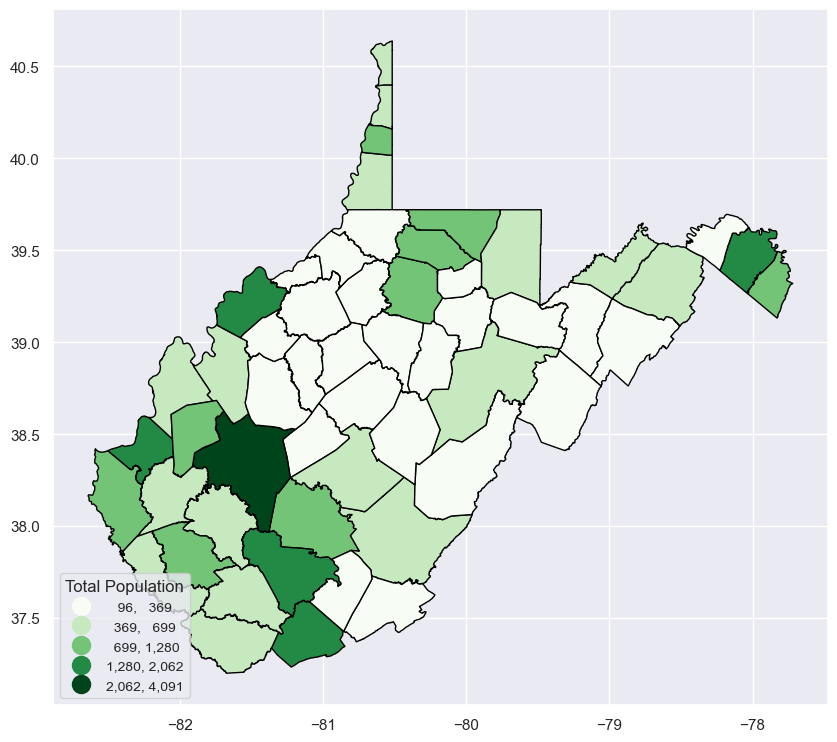

In [33]:
virginia_death_geo
virginia_death_geo_centroid = virginia_death_geo.copy()

virginia_death_geo_centroid["geometry"] = virginia_death_geo_centroid["geometry"].centroid


fig, ax = plt.subplots(1, figsize=(10,10))
virginia_death_geo.plot(ax=ax,column='Premature Deaths',legend=True,cmap='Greens',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Total Population''')

virginia_death_geo_centroid.plot(ax=ax,column='Death_by_population',legend=True,cmap='Reds',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.2f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #

ax.title.set_text("Death vs  Population")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Death Percentage ''')

ax.add_artist(l2)
ax.add_artist(l1)

## Now, let's analyze California Counties

In [ ]:

df_pop = pd.read_excel("./California/population.xlsx")
df_pop['County'] = df_pop['County'].str.replace(' County','')
df_pop = df_pop.rename(columns = {2015: 'Population'})
df_pop.head()

,County,Population
0,Alameda,1634538
1,Alpine,1077
2,Amador,37031
3,Butte,224631
4,Calaveras,44965


In [ ]:
CALIFORNIA = gpd.read_file('./California/California_County_Boundaries/cnty19_1.shp')
CALIFORNIA = CALIFORNIA.rename(columns = {'COUNTY_NAM':'County'})

In [ ]:
death_california = new_df[new_df['State'] == 'California']
print(death_california.columns)

Index(['State', 'Counties', 'Premature Deaths', 'Driving Deaths',
       'Injury Deaths'],
      dtype='object')


In [ ]:
death_california = new_df[new_df['State'] == 'California']

death_california = death_california.dropna()
# death_california
death_california = death_california.sort_values(by='Counties')

california_death_geo = pd.merge(death_california,CALIFORNIA, left_on='Counties',right_on='County', how = 'left')
california_death_geo = california_death_geo.drop('County',axis=1)
california_death_geo.head()

,State,Counties,Premature Deaths,Driving Deaths,Injury Deaths,OBJECTID,COUNTY_ABB,COUNTY_NUM,COUNTY_COD,COUNTY_FIP,ISLAND,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
0,California,Alameda,13444.0,438.0,3722.0,1,ALA,1,01,001,None,{E6F92268-D2DD-4CFB-8B79-5B4B2F07C559},308998.650975,-3.402787e+09,"POLYGON ((-13611173.233 4566017.932, -13611061..."
1,California,Amador,592.0,68.0,200.0,3,AMA,3,03,005,None,{4F45B3A6-BE10-461C-8945-6B2AAA7119F6},361708.438649,-2.562635e+09,"POLYGON ((-13366405.546 4679183.529, -13366408..."
2,California,Butte,3213.0,186.0,1128.0,4,BUT,4,04,007,None,{44FBA680-AECC-4E04-A499-29D69AFFBD4A},526547.113134,-7.339348e+09,"POLYGON ((-13478186.664 4807593.081, -13478502..."
3,California,Calaveras,744.0,63.0,217.0,5,CAL,5,05,009,None,{D11EF739-4A1E-414E-BFD1-E7DCD56CD61E},370637.579039,-4.351069e+09,"POLYGON ((-13360333.217 4641182.754, -13360329..."
4,California,Colusa,229.0,45.0,77.0,6,COL,6,06,011,None,{7BB40E7D-335A-4E8F-AABA-F003090D32EF},386191.550022,-4.992906e+09,"POLYGON ((-13568737.197 4776816.356, -13568737..."


In [ ]:
california_death_geo = pd.merge(california_death_geo,df_pop,left_on = 'Counties',right_on = 'County', how = 'left')

c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Axes: >

c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Axes: >

[]

[]

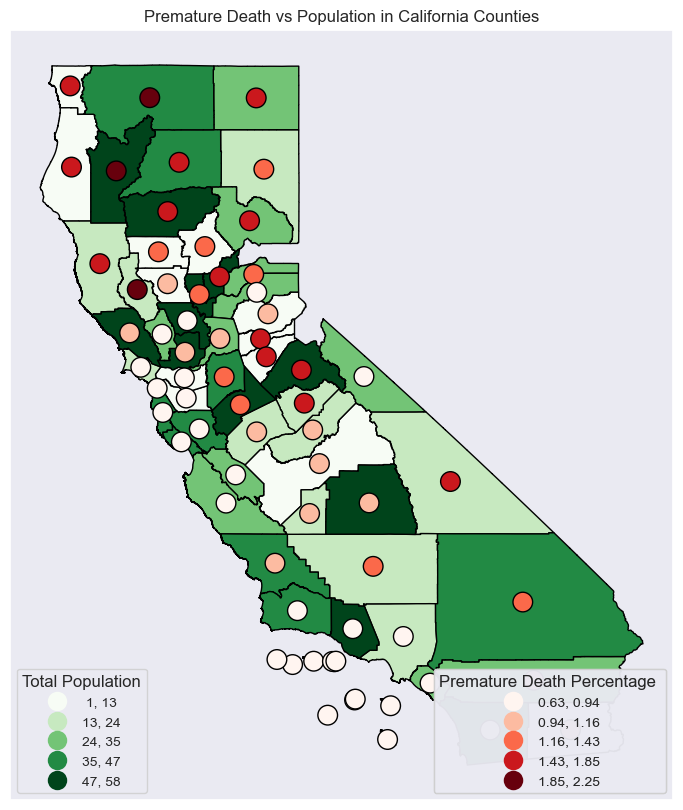

In [ ]:
# Calculate premature death percentage
california_death_geo['Premature_Death_Percentage'] = (california_death_geo['Premature Deaths'] / california_death_geo['Population']) * 100

#california_death_geo_centroid = california_death_geo.copy()
#california_death_geo_centroid["geometry"] = california_death_geo_centroid["geometry"].centroid

#converting the dataframe into geopandas

cal_data = gpd.GeoDataFrame(california_death_geo,geometry = 'geometry')
cal_data_centroid = cal_data.copy()
cal_data_centroid["geometry"] = cal_data_centroid["geometry"].centroid

# Plot the map
fig, ax = plt.subplots(1, figsize=(10, 10))

# Plot total population
cal_data.plot(ax=ax, column='COUNTY_NUM', legend=True, cmap='Greens', scheme='natural_breaks', k=5,
                  edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.0f}",
                                                              'loc': 'lower left', 'title_fontsize': 'medium',
                                                              'fontsize': 'small', 'markerscale': 1.4})

l1 = ax.get_legend()
l1.set_title('''Total Population''')

# Plot premature death percentage
cal_data_centroid.plot(ax=ax, column='Premature_Death_Percentage', legend=True, cmap='Reds', scheme='natural_breaks',
                          k=5, edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.2f}",
                                                                            'loc': 'lower right', 'title_fontsize': 'medium',
                                                                            'fontsize': 'small', 'markerscale': 1.4},
                          markersize=200)

ax.title.set_text("Premature Death vs Population in California Counties")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Premature Death Percentage ''')

ax.add_artist(l2)
ax.add_artist(l1)

plt.show()

c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Axes: >

c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Axes: >

[]

[]

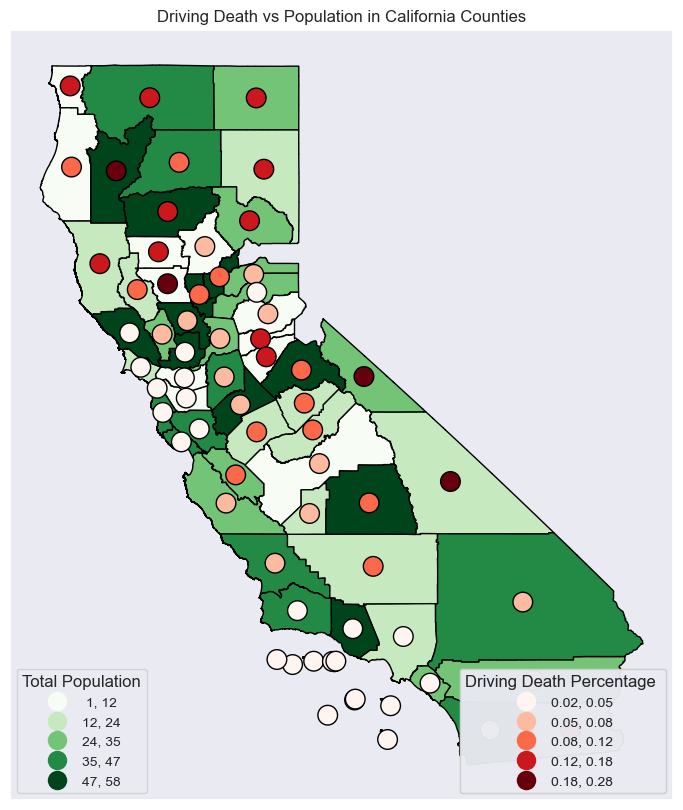

In [ ]:
# Calculate driving death percentage
california_death_geo['Driving_Death_Percentage'] = (california_death_geo['Driving Deaths'] / california_death_geo['Population']) * 100



cal_data = gpd.GeoDataFrame(california_death_geo,geometry = 'geometry')
cal_data_centroid = cal_data.copy()
cal_data_centroid["geometry"] = cal_data_centroid["geometry"].centroid

# Plot the map
fig, ax = plt.subplots(1, figsize=(10, 10))

# Plot total population
cal_data.plot(ax=ax, column='COUNTY_NUM', legend=True, cmap='Greens', scheme='natural_breaks', k=5,
                  edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.0f}",
                                                              'loc': 'lower left', 'title_fontsize': 'medium',
                                                              'fontsize': 'small', 'markerscale': 1.4})

l1 = ax.get_legend()
l1.set_title('''Total Population''')

# Plot driving death percentage
cal_data_centroid.plot(ax=ax, column='Driving_Death_Percentage', legend=True, cmap='Reds', scheme='natural_breaks',
                          k=5, edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.2f}",
                                                                            'loc': 'lower right', 'title_fontsize': 'medium',
                                                                            'fontsize': 'small', 'markerscale': 1.4},
                          markersize=200)

ax.title.set_text("Driving Death vs Population in California Counties")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Driving Death Percentage ''')

ax.add_artist(l2)
ax.add_artist(l1)

plt.show()

c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Axes: >

c:\Users\eshaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Axes: >

[]

[]

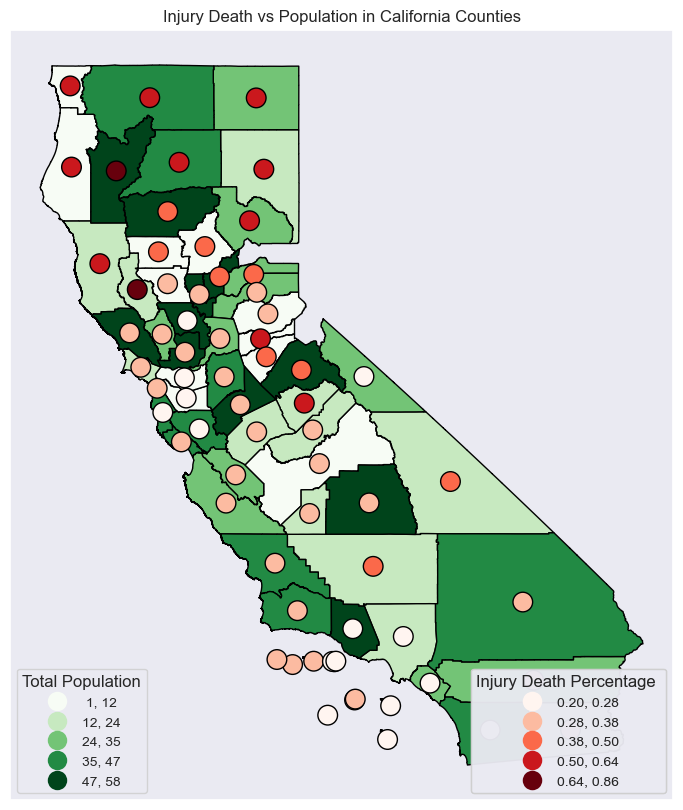

In [ ]:
# Calculate Injury death percentage
california_death_geo['Injury_Death_Percentage'] = (california_death_geo['Injury Deaths'] / california_death_geo['Population']) * 100



cal_data = gpd.GeoDataFrame(california_death_geo,geometry = 'geometry')
cal_data_centroid = cal_data.copy()
cal_data_centroid["geometry"] = cal_data_centroid["geometry"].centroid

# Plot the map
fig, ax = plt.subplots(1, figsize=(10, 10))


cal_data.plot(ax=ax, column='COUNTY_NUM', legend=True, cmap='Greens', scheme='natural_breaks', k=5,
                  edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.0f}",
                                                              'loc': 'lower left', 'title_fontsize': 'medium',
                                                              'fontsize': 'small', 'markerscale': 1.4})

l1 = ax.get_legend()
l1.set_title('''Total Population''')

# Plot injury death percentage
cal_data_centroid.plot(ax=ax, column='Injury_Death_Percentage', legend=True, cmap='Reds', scheme='natural_breaks',
                          k=5, edgecolor='black', linewidth=1, legend_kwds={"fmt": "{:,.2f}",
                                                                            'loc': 'lower right', 'title_fontsize': 'medium',
                                                                            'fontsize': 'small', 'markerscale': 1.4},
                          markersize=200)

ax.title.set_text("Injury Death vs Population in California Counties")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Injury Death Percentage ''')

ax.add_artist(l2)
ax.add_artist(l1)

plt.show()

## Analyzing Various Factors at West Virginia & California

In [37]:
req_columns = ['State','Excessive Adult Smoking','Premature Deaths']
df_2 = df[req_columns]
df_2['State'] 
df_2 = df_2.drop_duplicates(subset=['State'])
df_2.reset_index(drop=True, inplace=True)
df_2

0       Alabama
1       Alabama
2       Alabama
3       Alabama
4       Alabama
         ...   
3188    Wyoming
3189    Wyoming
3190    Wyoming
3191    Wyoming
3192    Wyoming
Name: State, Length: 3193, dtype: object

,State,Excessive Adult Smoking,Premature Deaths
0,Alabama,19.5,88086.0
1,Alaska,18.0,8663.0
2,Arizona,13.7,90822.0
3,Arkansas,21.6,50906.0
4,California,9.0,378883.0
5,Colorado,12.6,58091.0
6,Connecticut,12.6,38493.0
7,Delaware,15.8,13471.0
8,District of Columbia,12.3,8978.0
9,Florida,15.5,282304.0


In [43]:
population_death.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,State,name_alt,...,Driving Deaths,Injury Deaths,TOTAL_DEATH,Percentage_death,GEO_ID,P1_001N,Death_by_population,Premature Deaths by Population,Driving Deaths by Population,Injury Deaths by Population
46,Admin-1 scale rank,2,USA-3554,3554,US-WV,http://en.wikipedia.org/wiki/West_Virginia,US,1,West Virginia,WV|W.Va.,...,1394.0,12039.0,49594.0,0.8933,0400000US54,1793716,2.764875,2.015982,0.077716,0.671176
22,Admin-1 scale rank,2,USA-3544,3544,US-MS,http://en.wikipedia.org/wiki/Mississippi,US,5,Mississippi,MS|Miss.,...,3431.0,13808.0,73291.0,1.3201,0400000US28,2961279,2.474978,1.892831,0.115862,0.466285
15,Admin-1 scale rank,2,USA-3548,3548,US-KY,http://en.wikipedia.org/wiki/Kentucky,US,1,Kentucky,Commonwealth of Kentucky|KY,...,3852.0,22424.0,104664.0,1.8852,0400000US21,4505836,2.322854,1.739699,0.085489,0.497666
0,Admin-1 scale rank,2,USA-3541,3541,US-AL,http://en.wikipedia.org/wiki/Alabama,US,5,Alabama,AL|Ala.,...,4848.0,21249.0,114183.0,2.0566,0400000US01,5024279,2.272625,1.753207,0.096491,0.422926
40,Admin-1 scale rank,2,USA-3551,3551,US-TN,http://en.wikipedia.org/wiki/Tennessee,US,1,Tennessee,TN|Tenn.,...,5454.0,33732.0,155141.0,2.7943,0400000US47,6910840,2.244894,1.677871,0.078919,0.488103


In [47]:
merged_df = pd.merge(df_1,population_death)
merged_df

,State,Premature Deaths,Driving Deaths,Injury Deaths,Excessive Adult Smoking,Driving Alone,Adult Obesity,featurecla,scalerank,adm1_code,...,FCLASS_TLC,geometry,TOTAL_DEATH,Percentage_death,GEO_ID,P1_001N,Death_by_population,Premature Deaths by Population,Driving Deaths by Population,Injury Deaths by Population
0,Alabama,88086.0,4848.0,21249.0,19.5,83.782493,39.3,Admin-1 scale rank,2,USA-3541,...,None,"POLYGON ((-88.16696 34.99967, -86.90968 34.999...",114183.0,2.0566,0400000US01,5024279,2.272625,1.753207,0.096491,0.422926
1,Arizona,90822.0,4995.0,32367.0,13.7,72.531923,31.5,Admin-1 scale rank,2,USA-3520,...,None,"POLYGON ((-109.04522 36.99991, -109.04367 31.3...",128184.0,2.3088,0400000US04,7151502,1.792407,1.269971,0.069845,0.452590
2,Arkansas,50906.0,2745.0,12833.0,21.6,81.484503,37.2,Admin-1 scale rank,2,USA-3528,...,None,"POLYGON ((-89.66292 36.02307, -89.67351 35.940...",66484.0,1.1975,0400000US05,3011524,2.207653,1.690373,0.091150,0.426130
3,California,378883.0,18737.0,108182.0,9.0,70.141800,30.2,Admin-1 scale rank,2,USA-3521,...,None,"POLYGON ((-114.64222 35.05311, -114.62212 34.9...",505802.0,9.1103,0400000US06,39538223,1.279273,0.958270,0.047390,0.273614
4,Colorado,58091.0,3106.0,23685.0,12.6,70.624621,24.2,Admin-1 scale rank,2,USA-3522,...,None,"POLYGON ((-102.05017 40.00081, -102.04012 38.4...",84882.0,1.5289,0400000US08,5773714,1.470146,1.006129,0.053796,0.410221
5,Connecticut,38493.0,1423.0,13494.0,12.6,74.063253,29.5,Admin-1 scale rank,2,USA-3537,...,None,"POLYGON ((-73.49794 42.05451, -72.73222 42.035...",53410.0,0.9620,0400000US09,3605944,1.481166,1.067487,0.039463,0.374215
6,Delaware,13471.0,597.0,4211.0,15.8,76.781607,36.2,Admin-1 scale rank,2,USA-3555,...,None,"POLYGON ((-75.04839 38.44876, -75.71462 38.449...",18279.0,0.3292,0400000US10,989948,1.846461,1.360779,0.060306,0.425376
7,District of Columbia,8978.0,148.0,3317.0,12.3,30.726064,24.2,Admin-1 scale rank,2,USA-3556,...,None,"POLYGON ((-77.04124 38.78954, -77.04123 38.789...",12443.0,0.2241,0400000US11,689545,1.804523,1.302018,0.021463,0.481042
8,Florida,282304.0,15939.0,92013.0,15.5,76.082461,28.3,Admin-1 scale rank,2,USA-3542,...,None,"POLYGON ((-87.53039 30.27420, -87.45789 30.411...",390256.0,7.0291,0400000US12,21538187,1.811926,1.310714,0.074003,0.427209
9,Georgia,143179.0,7755.0,36347.0,16.3,75.985623,34.3,Admin-1 scale rank,2,USA-3543,...,None,"POLYGON ((-85.00519 30.99069, -85.05442 31.108...",187281.0,3.3732,0400000US13,10711908,1.748344,1.336634,0.072396,0.339314


In [58]:
hv.extension('plotly')
data = merged_df[["Adult Obesity","Premature Deaths by Population"]]

points = hv.Points(data)
points.opts(size =5)

labels = hv.Labels({('x','y'):data, 'text' : population_death['State'].values},['x','y'],'text')

# (points*labels).opts(
#     width = 800
# )

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Points   [Adult Obesity,Premature Deaths by Population]

In [59]:
hv.extension('plotly')
data = merged_df[["Driving Alone","Driving Deaths by Population"]]

points = hv.Points(data)
points.opts(size =5)

labels = hv.Labels({('x','y'):data, 'text' : population_death['State'].values},['x','y'],'text')

# (points*labels).opts(
#     width = 800
# )

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Points   [Driving Alone,Driving Deaths by Population]

In [61]:
hv.extension('plotly')
data = merged_df[["Excessive Adult Smoking","Injury Deaths by Population"]]

points = hv.Points(data)
points.opts(size =5)

labels = hv.Labels({('x','y'):data, 'text' : population_death['State'].values},['x','y'],'text')

# (points*labels).opts(
#     width = 800
# )

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Points   [Excessive Adult Smoking,Injury Deaths by Population]